# Machine Learning Exercise

Python Machine Learning Tutorial (Data Science)<br/>
https://www.youtube.com/watch?v=7eh4d6sabA0
<br/>
https://www.w3schools.com/python/python_ml_decision_tree.asp

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('csv/music.csv')

df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


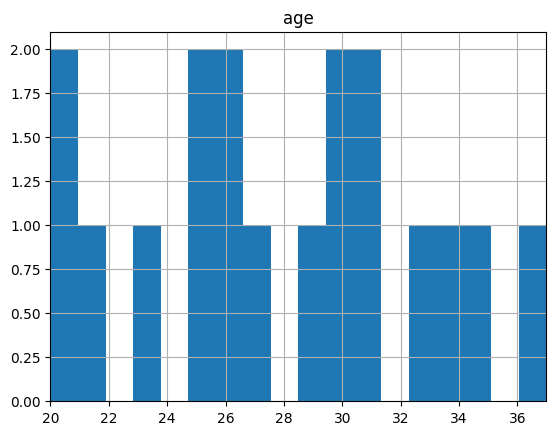

In [4]:
n_bins = len(df)

df.hist(column='age' ,bins=n_bins)
plt.xlim([20,37])
plt.show()

<AxesSubplot:xlabel='age', ylabel='gender'>

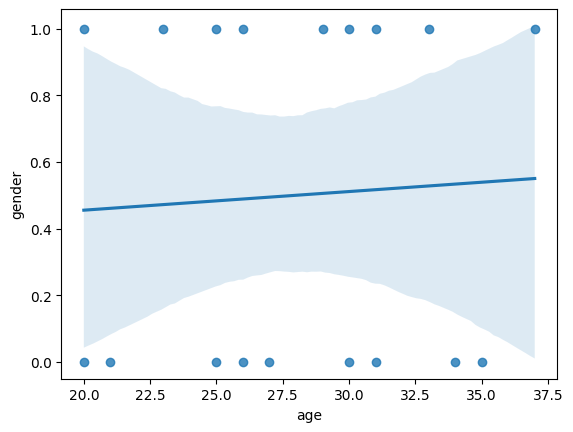

In [5]:
sns.regplot(data=df,x='age',y='gender')

In [6]:
print(np.var(df))

age       24.830247
gender     0.250000
dtype: float64


/Users/rsfagundes/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [7]:
df['age'].value_counts().to_frame()

,age
20,2
25,2
26,2
30,2
31,2
23,1
29,1
33,1
37,1
21,1


In [8]:
df['gender'].value_counts().to_frame()

,gender
1,9
0,9


In [9]:
X = df.drop(columns=['genre'])

y = df['genre'].to_frame()

In [10]:
#0 = male
#1 = female
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [11]:
y

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz
5,Jazz
6,Classical
7,Classical
8,Classical
9,Dance


#### Simple Prediction

In [12]:
model = DecisionTreeClassifier()

model.fit(X,y)

predictions = model.predict([[21,1],[22,0]])

predictions

/Users/rsfagundes/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['HipHop', 'Dance'], dtype=object)

#### Calculating Accuracy

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

new_model = DecisionTreeClassifier()

new_model.fit(X_train,y_train)

new_predictions = new_model.predict(X_test)

new_predictions

array(['Jazz', 'Classical', 'HipHop', 'Classical'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, new_predictions)

score

#If we run this, we might get a different value everytime, as the test numbers are picked randomly 

1.0

#### Persisting Models

In [15]:
import joblib

joblib.dump(new_model, 'model/music_recomender.joblib')

['model/music_recomender.joblib']

In [16]:
loaded_model = joblib.load('model/music_recomender.joblib')
prediction = loaded_model.predict([[21,0]])
prediction

/Users/rsfagundes/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Dance'], dtype=object)

#### Visualizing Decision Trees

In [17]:
from sklearn import tree

tree.export_graphviz(loaded_model,
                     out_file='dot/music_recomender.dot',
                     feature_names=['age','gender'],
                     class_names=sorted(y['genre'].unique()),
                     label='all',
                     rounded=True,
                     filled=True)

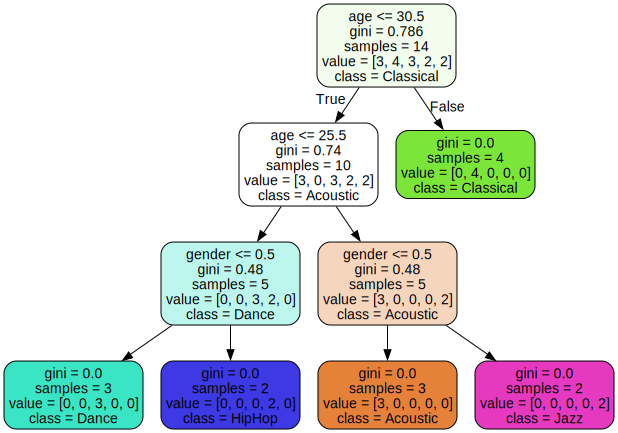

In [18]:
import graphviz

with open('dot/music_recomender.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)